In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [48]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve


1.Logistic Regression

Data collection and processing


In [ ]:
# loading the csv dta to pandas dataframe
heart_data=pd.read_csv('/content/drive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv')
heart_data

,Target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,0,1,1,1,18,0,0,2,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [ ]:
#print sample of this data seyt
heart_data.head()

,Target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
#print last five data
heart_data.tail()


,Target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,0,1,1,1,18,0,0,2,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1
253679,1,1,1,1,25,0,0,2,1,1,...,1,0,2,0,0,0,0,9,6,2


In [ ]:
#nnumber of rows and columns
heart_data.shape


(253680, 22)

In [ ]:
#getting some info about the data
heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Target             253680 non-null  int64
 1   HighBP             253680 non-null  int64
 2   HighChol           253680 non-null  int64
 3   CholCheck          253680 non-null  int64
 4   BMI                253680 non-null  int64
 5   Smoker             253680 non-null  int64
 6   Stroke             253680 non-null  int64
 7   Diabetes           253680 non-null  int64
 8   PhysActivity       253680 non-null  int64
 9   Fruits             253680 non-null  int64
 10  Veggies            253680 non-null  int64
 11  HvyAlcoholConsump  253680 non-null  int64
 12  AnyHealthcare      253680 non-null  int64
 13  NoDocbcCost        253680 non-null  int64
 14  GenHlth            253680 non-null  int64
 15  MentHlth           253680 non-null  int64
 16  PhysHlth           253680 non-null  in

In [ ]:
#checking for missing values
heart_data.isnull().sum()

Target               0
HighBP               0
HighChol             0
CholCheck            0
BMI                  0
Smoker               0
Stroke               0
Diabetes             0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
AnyHealthcare        0
NoDocbcCost          0
GenHlth              0
MentHlth             0
PhysHlth             0
DiffWalk             0
Sex                  0
Age                  0
Education            0
Income               0
dtype: int64

In [ ]:
#statistical measures about the data
heart_data.describe()

,Target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,32.128477,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,12.216882,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,24.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,32.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,40.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,52.000000,6.000000,8.000000


In [49]:
heart_data['Age'] = heart_data['Age']*4
heart_data.corr()

,Target,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Target,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


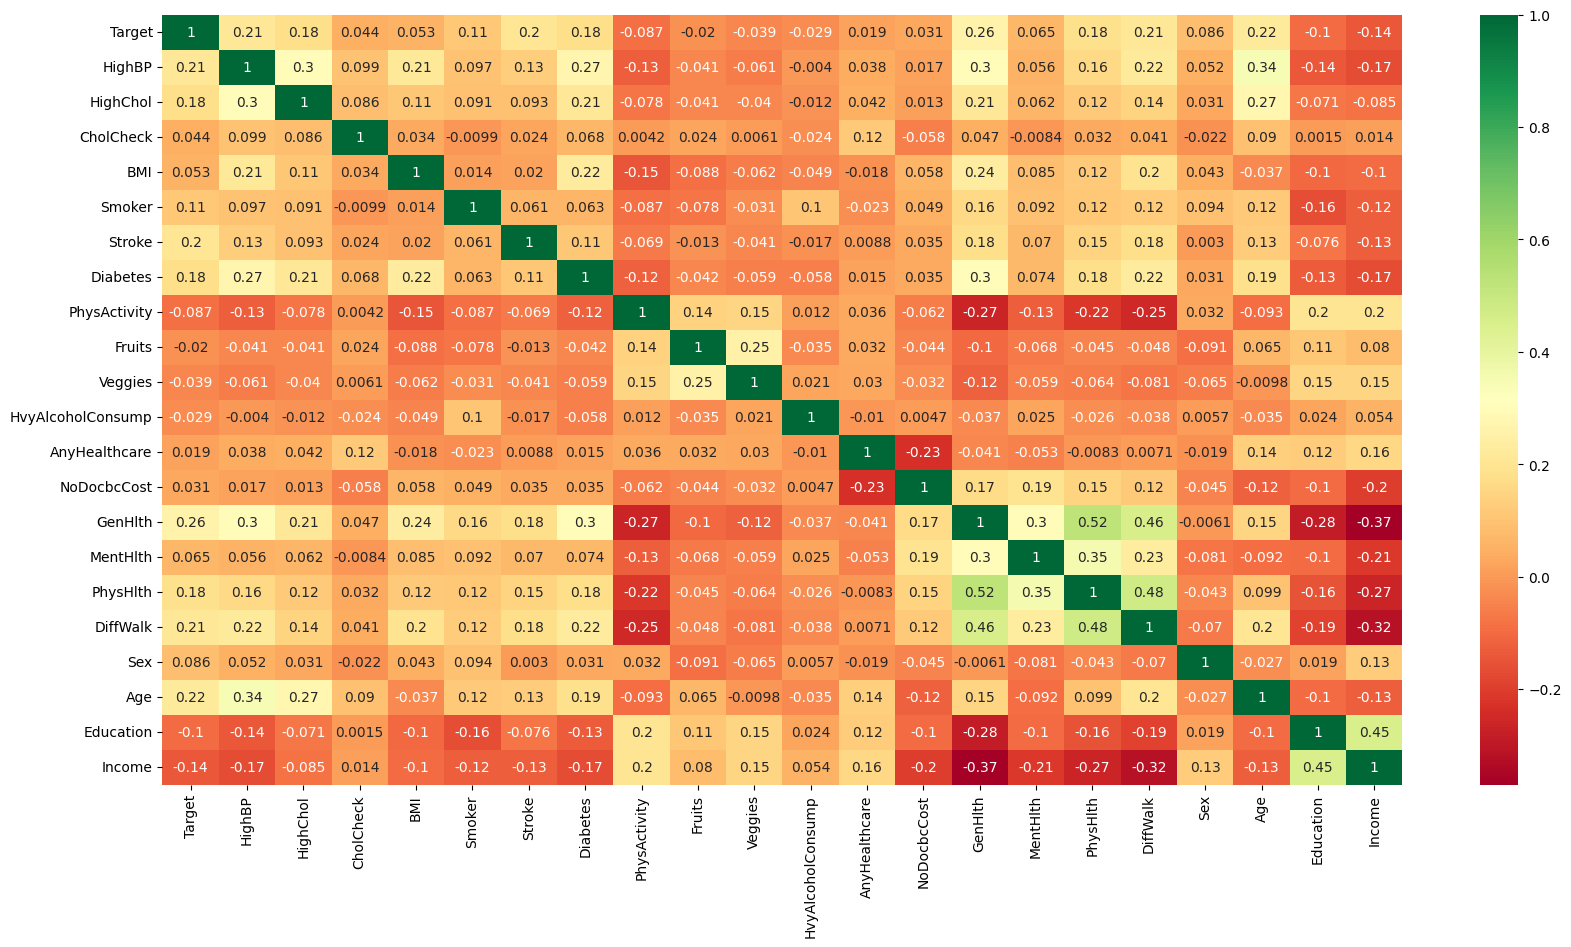

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat=heart_data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(heart_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


<Axes: xlabel='Age', ylabel='Density'>

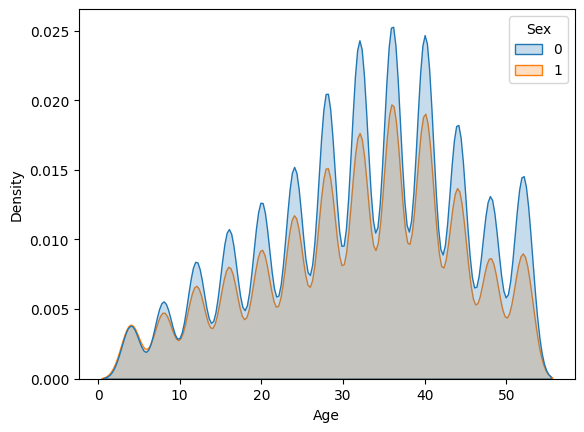

In [ ]:
sns.kdeplot(data=heart_data,x='Age',fill=True,hue='Sex')

<Axes: xlabel='Smoker', ylabel='count'>

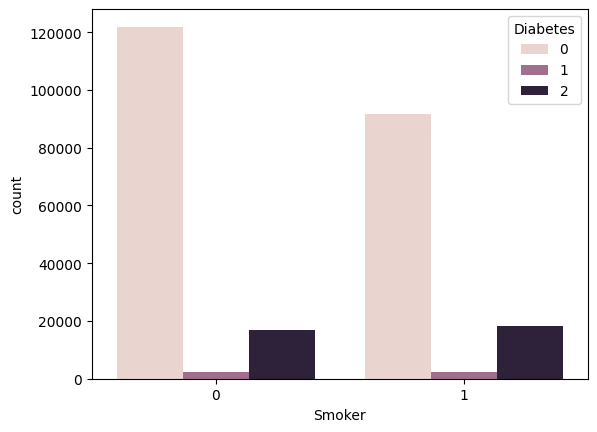

In [ ]:
sns.countplot(x='Smoker', data=heart_data, hue='Diabetes')

In [ ]:
heart_data['Target'].value_counts()

0    229787
1     23893
Name: Target, dtype: int64

In [ ]:
X=heart_data.drop(['Target'], axis=1)
Y=heart_data['Target']

Splitting ,Training and Testing the data


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
Y_train.value_counts()

0    183779
1     19165
Name: Target, dtype: int64

In [57]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
X_train,Y_train=sampler.fit_resample(X_train,Y_train)
Y_train.value_counts()


0    160947
1    160947
Name: Target, dtype: int64

In [58]:
print(X.shape,X_train.shape,X_test.shape)

(253680, 21) (321894, 21) (76104, 21)


Model Training


1. Logistic Regression

In [59]:
model=LogisticRegression()

In [60]:
#model training the logistic Regression model with training data
model.fit(X_train,Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [61]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [62]:
print("Accuracy on training tha data : ",training_data_accuracy*100)

Accuracy on training tha data :  77.882159965703


In [64]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [65]:
print("Accuracy on Test data : ",test_data_accuracy*100)

Accuracy on Test data :  75.09854935351625


In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Example: Create a new instance for prediction
new_instance = np.array([0,0,1,28,0,0,0,1,1,0,0,1,0,1,0,0,0,0,2,5,2])

# Reshape the new instance to match the expected shape (1, -1)
new_instance_reshaped = new_instance.reshape(1, -1)

# Standardize the new instance using the same scaler
new_instance_scaled = scaler.transform(new_instance_reshaped)

# Make predictions using the trained Decision Tree model
prediction = model.predict(new_instance_scaled)

# Interpret the prediction
if prediction == 1:
    print("The individual is predicted to have heart disease.")
else:
    print("The individual is predicted to not have heart disease.")


The individual is predicted to have heart disease.


2.Decision tree Classifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
Y = heart_data["Target"]
X = heart_data.drop('Target',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((177576, 21), (76104, 21))

In [ ]:
# Decision Tree
m1 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 5)
dt.fit(X_train, Y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(Y_test, dt_predicted)
dt_acc_score = accuracy_score(Y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")

print(classification_report(Y_test,dt_predicted))

confussion matrix
[[68695   145]
 [ 7023   241]]


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     68840
           1       0.62      0.03      0.06      7264

    accuracy                           0.91     76104
   macro avg       0.77      0.52      0.51     76104
weighted avg       0.88      0.91      0.87     76104



In [ ]:
print("Accuracy OF DecisionTreeClassifier:",dt_acc_score*100,'\n')

Accuracy OF DecisionTreeClassifier: 90.5813097866078 



3.Random Forest classifier


In [ ]:
# Random Forest
m2 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,Y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(Y_test, rf_predicted)
rf_acc_score = accuracy_score(Y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")

print(classification_report(Y_test,rf_predicted))

confussion matrix
[[32067 13863]
 [ 1115  3691]]


              precision    recall  f1-score   support

           0       0.97      0.70      0.81     45930
           1       0.21      0.77      0.33      4806

    accuracy                           0.70     50736
   macro avg       0.59      0.73      0.57     50736
weighted avg       0.89      0.70      0.77     50736



In [ ]:
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')

Accuracy of Random Forest: 70.47855566067487 



Building predictive system

Ensembling


In [ ]:
model_ev = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression'], 'Accuracy': [dt_acc_score*100,
                                                    rf_acc_score*100,test_data_accuracy*100,]})
model_ev


,Model,Accuracy
0,Decision Tree,90.581310
1,Random Forest,70.478556
2,Logistic Regression,72.309603
